# <center>A Report on Sentiment Analysis</center>

## 1. Data Exploration

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('data/sentiment_5_class_train.csv')
test_df = pd.read_csv('data/sentiment_5_class_test.csv')

In [3]:
train_df.head()

,Phrase,Sentiment
0,the prisoner,2
1,The sheer joy and pride they took in their wor...,3
2,has never made a more sheerly beautiful film t...,3
3,the story has the sizzle of old news that has ...,3
4,far superior,4


In [4]:
test_df.head()

,Phrase,Sentiment
0,"makes for a touching love story , mainly becau...",3
1,a truly magical movie,4
2,check,3
3,is a remarkably accessible and haunting film .,4
4,are too cute,3


In [5]:
train_df.shape

(14711, 2)

In [6]:
test_df.shape

(3678, 2)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14711 entries, 0 to 14710
Data columns (total 2 columns):
Phrase       14711 non-null object
Sentiment    14711 non-null int64
dtypes: int64(1), object(1)
memory usage: 230.0+ KB


In [8]:
train_df['Sentiment'].unique()

array([2, 3, 4, 0, 1])

Our dataset contains a total of **14711 entries in the training set** and **3678 entries in the testing set**. The are only two columns - the feature is the phrase and the target is the value of sentiment ranging from 0 to 4, 0 being very bad and 4 being very good.

## 2. Visualization

In [9]:
train_df['Sentiment'].value_counts()

3    7033
4    3649
2    1876
1    1165
0     988
Name: Sentiment, dtype: int64

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of reviews in each sentiment')

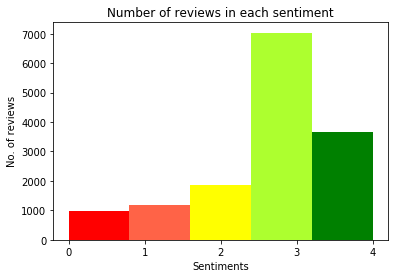

In [11]:
colors = ['red', 'tomato', 'yellow', 'greenyellow', 'green']
n, bins, patches = plt.hist(train_df['Sentiment'], bins=5)

for index, p in enumerate(patches):
    plt.setp(p, 'facecolor', colors[index])
    
plt.xticks([0,1,2,3,4])
plt.xlabel('Sentiments')
plt.ylabel('No. of reviews')
plt.title('Number of reviews in each sentiment')

The dataset is dominated by instances from the positive sentiment.

## 3. Preprocessing

### Based on length of review

In [12]:
one_word_reviews = train_df[train_df['Phrase'].apply(lambda x: len(x.split())) == 1]
two_word_reviews = train_df[train_df['Phrase'].apply(lambda x: len(x.split())) == 2]
three_word_reviews = train_df[train_df['Phrase'].apply(lambda x: len(x.split())) == 3]
four_word_reviews = train_df[train_df['Phrase'].apply(lambda x: len(x.split())) == 4]
five_word_reviews = train_df[train_df['Phrase'].apply(lambda x: len(x.split())) == 5]
multi_word_reviews = train_df[train_df['Phrase'].apply(lambda x: len(x.split())) > 5]

In [13]:
len(one_word_reviews) + len(two_word_reviews) + len(three_word_reviews) + len(four_word_reviews) + len(five_word_reviews) + len(multi_word_reviews)

14710

Of the total 14711, one review doesn't fall under any of the class based on word length. So, the remaining review must be an empty review.

In [14]:
train_df[train_df['Phrase'].apply(lambda x: len(x.split())) == 0]

,Phrase,Sentiment
6189,,1


### Drop empty review

In [15]:
index = train_df[train_df['Phrase'].apply(lambda x: len(x.split())) == 0].index
index

Int64Index([6189], dtype='int64')

In [16]:
train_df.drop(index, inplace=True)

In [17]:
reviews_by_length = [one_word_reviews, two_word_reviews, three_word_reviews, four_word_reviews, five_word_reviews, 
                     multi_word_reviews]
n = len(reviews_by_length)

def count_by_length(sentiment):
    return [len(x[x['Sentiment']==sentiment]) for x in reviews_by_length]

counts_by_length = [count_by_length(0), count_by_length(1), count_by_length(2),
                   count_by_length(3), count_by_length(4)]

In [18]:
import numpy as np

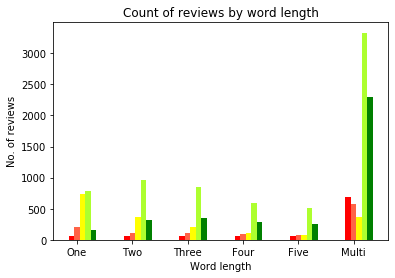

In [19]:
x_pos = np.arange(n)
bar_width = 0.1
labels = ['Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good']

for i in range(5):
    plt.bar(x_pos + bar_width*i, counts_by_length[i], bar_width, color=colors[i], label=labels[i])

plt.xlabel('Word length')
plt.ylabel('No. of reviews')
plt.title('Count of reviews by word length')
plt.xticks(x_pos + bar_width, ['One', 'Two', 'Three', 'Four', 'Five', 'Multi'])

plt.show()

Neutral review are as common as good reviews for one word review. For everything else, it is dominated by Sentiment 3.

In [20]:
from pandas_profiling import ProfileReport

In [21]:
profile = ProfileReport(train_df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [22]:
profile.to_widgets()

No new information could be extracted with pandas profiling.

## 4. Feature Extraction

In [23]:
X_train = train_df['Phrase'].tolist()
y_train = train_df['Sentiment'].tolist()

X_test = test_df['Phrase'].tolist()
y_test = test_df['Sentiment'].tolist()

In [24]:
print('Size of training set: ', len(X_train))
print('Size of testing set:',  len(X_test))

Size of training set:  14710
Size of testing set: 3678


### TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [27]:
X_train_v = vectorizer.transform(X_train)
X_test_v = vectorizer.transform(X_test)

In [28]:
X_train_v.shape

(14710, 7115)

## Checking if dataset is balanced

In [29]:
from collections import Counter

In [30]:
Counter(y_train)

Counter({2: 1876, 3: 7033, 4: 3649, 0: 988, 1: 1164})

The dataset is highly imbalanced.

**SMOTE Oversampling**

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X_train_v, y_train)
Counter(y_smote)

/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({2: 7033, 3: 7033, 4: 7033, 0: 7033, 1: 7033})

**Random Oversampling**

In [32]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
x_over, y_over = over_sampler.fit_resample(X_train_v, y_train)
Counter(y_over)

Counter({2: 7033, 3: 7033, 4: 7033, 0: 7033, 1: 7033})

**Random Undersampling**

In [33]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
x_under, y_under = under_sampler.fit_resample(X_train_v, y_train)
Counter(y_under)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 988, 1: 988, 2: 988, 3: 988, 4: 988})

### Helper function for pickling

In [34]:
import pickle
from pathlib import Path

In [35]:
def pickle_exists(filename):
    file = Path('models/' + filename + '.pkl')
    if file.is_file():
        return True
    return False

def save_model(model, filename):
    pickle.dump(model, open('models/' + filename + '.pkl', 'wb'))
    
def load_model(filename):
    return pickle.load(open('models/' + filename + '.pkl', 'rb'))

## 5. Grid Search

In [36]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report

### Helper functions for Grid Search

In [37]:
scorer = make_scorer(f1_score, average='macro')

def get_f1_score_of_model(model, x_test, y_test):
    y_predictions = model.predict(x_test)
    return f1_score(y_test, y_predictions, average='macro')
    
def grid_search_classifier(classifier, x_train, y_train, x_test, y_test, grid_params):
    clf = GridSearchCV(classifier(), grid_params, scoring=scorer)
    clf.fit(x_train, y_train)
    best_model = classifier(**clf.best_params_)
    best_model.fit(x_train, y_train)
    return best_model, get_f1_score_of_model(best_model, x_test, y_test)

#### Listing all classifiers along with the hyperparameters

In [41]:
random_state = [42]
classifiers = [
    (SVC, 
     {
         'kernel':('linear', 'rbf', 'sigmoid'), 
         'C':(1, 5, 10), 
         'decision_function_shape':('ovo','ovr'),
         'random_state': random_state
     },
    'svm'),
    (DecisionTreeClassifier, 
     {
         'max_depth': (3,5,9),
         'min_samples_split': (2,6,10),
         'random_state': random_state
     },
    'decision_tree'),
    (RandomForestClassifier, 
     {
         'max_depth': (3,5,9),
         'min_samples_split': (2,6,10),
         'random_state': random_state
     },
    'random_forest'),
    (ExtraTreesClassifier, 
     {
         'max_depth': (3,5,9),
         'min_samples_split': (2,6,10),
         'random_state': random_state
     },
     'extra_trees'
    ),
    (AdaBoostClassifier, 
     {
         'n_estimators': (5,10,20),
         'random_state': random_state
     },
     'ada_boost'),
    (GradientBoostingClassifier, 
     {
         'n_estimators': (5,10,20),
         'min_samples_split': (2,6,10),
         'random_state': random_state
     },
    'gradient_boosting')
]

### Model Building and Accuracy Calculation

A check will be made to see if the pickle for a given model already exists. If so, the model will be loaded from the file, else a new model will be built using the grid params and saved to the file.

In [45]:
summary = []

samplings = ['default', 'smote_over_sampling', 'random_over_sampling', 'random_under_sampling']
xtrains = [X_train_v, x_smote, x_over, x_under]
ytrains = [y_train, y_smote, y_over, y_under]

for classifier, grid_params, filename in classifiers:
    for index, sampling in enumerate(samplings):
        filename_with_sampling = filename + '_' + sampling
        if pickle_exists(filename_with_sampling):
            print('\nPickle already exists for ' + classifier.__name__ + ' with ' + sampling + ' config. Loading from file...')
            model = load_model(filename_with_sampling)
            score = get_f1_score_of_model(model, X_test_v, y_test)
        else:
            print('\nNo pickle found for ' + classifier.__name__ + ' with ' + sampling + ' config. Training model and saving to file...')
            model, score = grid_search_classifier(classifier, xtrains[index], ytrains[index], X_test_v, y_test, grid_params)
            save_model(model, filename_with_sampling)
        print(model)
        print('\nF1 Score for ' + classifier.__name__ + ' with ' + sampling + ' config: ')
        print(score)
        summary.append({'Classifier': classifier.__name__, 'Sampling': sampling, 'F1 Score': score})
    
pd.DataFrame(summary)


Pickle already exists for SVC with default config. Loading from file...
SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

F1 Score for SVC with default config: 
0.6792077809318241

Pickle already exists for SVC with smote_over_sampling config. Loading from file...
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

F1 Score for SVC with smote_over_sampling config: 
0.6753729325333963

Pickle already exists for SVC with random_over_sampling config. Loading from file...
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale',

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=9, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=6,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

F1 Score for ExtraTreesClassifier with random_under_sampling config: 
0.39166949207210183

Pickle already exists for AdaBoostClassifier with default config. Loading from file...
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=20, random_state=42)

F1 Score for AdaBoostClassifier with default config: 
0.23405893909183542

Pickle already exists for AdaBoostClassifier with smote_over_sampling config. Loading

,Classifier,Sampling,F1 Score
0,SVC,default,0.679208
1,SVC,smote_over_sampling,0.675373
2,SVC,random_over_sampling,0.672170
3,SVC,random_under_sampling,0.568650
4,DecisionTreeClassifier,default,0.206204
5,DecisionTreeClassifier,smote_over_sampling,0.226883
6,DecisionTreeClassifier,random_over_sampling,0.221959
7,DecisionTreeClassifier,random_under_sampling,0.228484
8,RandomForestClassifier,default,0.133346
9,RandomForestClassifier,smote_over_sampling,0.285090


Classifier|Default|Over Sampling with SMOTE|Random Over Sampling|Random Under Sampling|Best
----------|-------|------------------------|--------------------|---------------------|----
SVM|<strong>F1Score</strong><br>0.679208<br><br><strong>Best Params</strong><br>kernel=rbf<br>C=5<br>decision_function_shape=ovo|<strong>F1Score</strong><br>0.675373<br><br><strong>Best Params</strong><br>kernel=rbf<br>C=10<br>decision_function_shape=ovo|<strong>F1Score</strong><br>0.672170<br><br><strong>Best Params</strong><br>kernel=rbf<br>C=10<br>decision_function_shape=ovo|<strong>F1Score</strong><br>0.568650<br><br><strong>Best Params</strong><br>kernel=rbf<br>C=5<br>decision_function_shape=ovo|Default
DecisionTree|<strong>F1Score</strong><br>0.206204<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=10|<strong>F1Score</strong><br>0.226883<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=6|<strong>F1Score</strong><br>0.221959<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=2|<strong>F1Score</strong><br>0.228484<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=10|Random Under Sampling
RandomForest|<strong>F1Score</strong><br>0.133346<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=10|<strong>F1Score</strong><br>0.285090<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=2|<strong>F1Score</strong><br>0.344309<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=2|<strong>F1Score</strong><br>0.333651<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=2|Random Over Sampling
ExtraTrees|<strong>F1Score</strong><br>0.129410<br><br><strong>Best Params</strong><br>max_depth=3<br>min_samples_split=2|<strong>F1Score</strong><br>0.369073<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=10|<strong>F1Score</strong><br>0.392291<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=2|<strong>F1 Score</strong><br>0.391669<br><br><strong>Best Params</strong><br>max_depth=9<br>min_samples_split=6|Random Over Sampling
AdaBoost|<strong>F1Score</strong><br>0.234059<br><br><strong>Best Params</strong><br>n_estimators=20|<strong>F1Score</strong><br>0.215900<br><br><strong>Best Params</strong><br>n_estimators=20|<strong>F1Score</strong><br>0.219558<br><br><strong>Best Params</strong><br>n_estimators=20|<strong>F1Score</strong><br>0.223002<br><br><strong>Best Params</strong><br>n_estimators=20|Default
GradientBoosting|<strong>F1Score</strong><br>0.220281<br><br><strong>Best Params</strong><br>n_estimators=20<br>min_samples_split=10|<strong>F1 Score</strong><br>0.319776<br><br><strong>Best Params</strong><br>n_estimators=20<br>min_samples_split=6|<strong>F1 Score</strong><br>0.304587<br><br><strong>Best Params</strong><br>n_estimators=20<br>min_samples_split=10|<strong>F1 Score</strong><br>0.294341<br><br>n_estimators=20<br>min_samples_split=2|SMOTE Over Sampling
Best|SVM|SVM|SVM|SVM|SVM without Sampling

The best f1 score achieved was *0.679208* on **SVM**. The hyperparameters used here were C=5, decision_function_shape=ovo and kernel=rbf.